In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [339]:
df = pd.read_csv("train.csv")

In [340]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [341]:
df.info()
df.Embarked.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


S    644
C    168
Q     77
Name: Embarked, dtype: int64

Have NaN info about **Age**, **Cabin** and a bit of **Embarked**. I guess NaN age can be filled up with mean value. Info about cabins is easier to drop completely. And 2 lost values of embarked can be made null or mean.

In [342]:
def prepare_df(unprepared_df):
    preparing_df = unprepared_df.drop(columns=["Cabin"])
    age = preparing_df.Age.mean()
    fare = preparing_df.Fare.mean()
    new_nan_values ={"Age": age, "Fare": fare, "Embarked": "S"}
    preparing_df = preparing_df.fillna(value=new_nan_values)
    preparing_df["Sex"].replace(["female", "male"], [0, 1], inplace=True)
    preparing_df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
    return preparing_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 69.7+ KB
None


<AxesSubplot:>

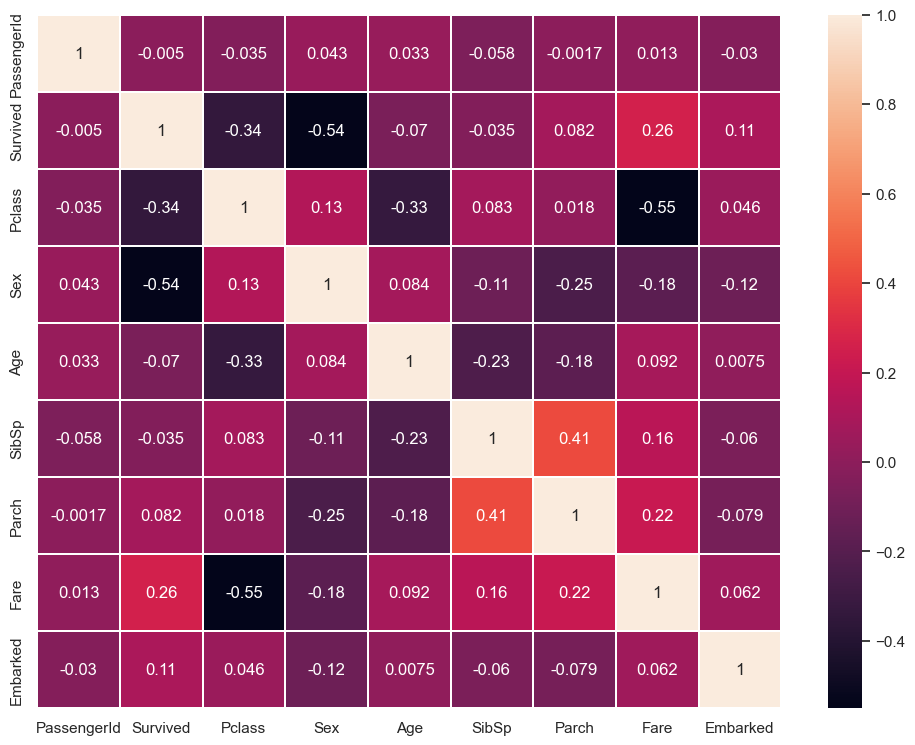

In [343]:
df = prepare_df(df)
print(df.info())
numeric=df.select_dtypes(exclude=['object'])
correlation_mtrx=numeric.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_mtrx, annot=True, linewidths=0.1)

In [344]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ~df.columns.isin(["Survived", "Name", "Ticket", "PassengerId"])]
y = df.Survived
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), mean_squared_error(y_v, preds), model.score(X_t, y_t), model.score(X_v, y_v)

In [346]:
LR_Model = LogisticRegression(max_iter=10000)
print(score_model(LR_Model))

(0.17318435754189945, 0.17318435754189945, 0.8061797752808989, 0.8268156424581006)


In [347]:
test_df = pd.read_csv("test.csv")
prep_df = prepare_df(test_df)
prep_df = prep_df.loc[:, ~prep_df.columns.isin(["Name", "Ticket", "PassengerId"])]
LR_Model.fit(X, y)
predictions = LR_Model.predict(prep_df)

In [348]:
print(predictions.size)

418


In [350]:
series = pd.Series(predictions)
series.name = "Survived"
predicts_df = test_df.PassengerId.to_frame().join(series)
predicts_df = predicts_df.set_index("PassengerId")
predicts_df.to_csv("predictions.csv")